<a href="https://colab.research.google.com/github/HesaZidni/Roboflow_detection_football_players/blob/main/vehicle_part_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
# project = rf.workspace("testingws").project("object-detection-bbaki")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IiOURgEM2z35uuBtJm0p")
project = rf.workspace("hesazidni").project("deteksi-pemain-sepak-bola")
version = project.version(2)
dataset = version.download("yolov8")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-pemain-sepak-bola-2 in yolov8:: 100%|██████████| 212/212 [00:00<00:00, 4402.05it/s]


In [4]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/Deteksi-pemain-sepak-bola-2


In [6]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/Deteksi-pemain-sepak-bola-2/data.yaml", epochs=25, imgsz=320)

Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Deteksi-pemain-sepak-bola-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Deteksi-pemain-sepak-bola-2/train/labels... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<00:00, 760.34it/s]

train: New cache created: /content/Deteksi-pemain-sepak-bola-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Deteksi-pemain-sepak-bola-2/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 1353.84it/s]

val: New cache created: /content/Deteksi-pemain-sepak-bola-2/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.952      4.624      1.076         65        320: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all         24        575          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      2.629      4.315     0.9851         31        320: 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all         24        575          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      2.754       3.54     0.9755         58        320: 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         24        575      0.017     0.0445       0.01    0.00315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G       2.78      2.643     0.9212         78        320: 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.97s/it]

                   all         24        575     0.0195     0.0607     0.0134    0.00482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      2.459       2.05     0.9044         26        320: 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         24        575     0.0187     0.0737      0.014     0.0042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      2.405      1.889     0.8485         43        320: 100%|██████████| 5/5 [00:15<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         24        575     0.0191     0.0853     0.0181    0.00689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      2.296      1.729     0.8767         49        320: 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all         24        575     0.0256      0.147     0.0371     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G        2.4      1.643     0.8696         60        320: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         24        575      0.029      0.176     0.0576      0.019



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      2.325      1.602     0.8651         39        320: 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all         24        575     0.0298      0.203     0.0845     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      2.527      1.635     0.8402         86        320: 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         24        575     0.0291      0.221     0.0916     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      2.259      1.479     0.8569         42        320: 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]

                   all         24        575     0.0281      0.218     0.0978     0.0288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      2.357      1.478     0.8717         38        320: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all         24        575     0.0295      0.232      0.121     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G       2.35      1.518     0.8599         37        320: 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all         24        575     0.0291      0.224      0.118     0.0391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      2.196      1.413     0.8423         54        320: 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all         24        575     0.0265      0.209     0.0902     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      2.263      1.405     0.8344         69        320: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         24        575     0.0303      0.239      0.114     0.0314


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      2.078      1.254     0.8501         37        320: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         24        575     0.0321      0.268      0.121     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G       2.03      1.272     0.8572         33        320: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         24        575      0.119       0.19       0.13     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      2.269      1.673     0.8646         27        320: 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.19s/it]

                   all         24        575      0.917      0.112      0.133     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G          2      1.259     0.8554         45        320: 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

                   all         24        575      0.928     0.0926      0.132     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      2.115      1.302     0.8414         45        320: 100%|██████████| 5/5 [00:15<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         24        575      0.946     0.0901      0.139     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      2.011      1.308     0.8202         39        320: 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all         24        575      0.946      0.105      0.148     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.925      1.237     0.8581         41        320: 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         24        575      0.941      0.114      0.152     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.848      1.183     0.8239         48        320: 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         24        575      0.937      0.119      0.155     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.916       1.19     0.8228         44        320: 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         24        575      0.927      0.131      0.156     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G       1.98      1.242     0.8349         43        320: 100%|██████████| 5/5 [00:14<00:00,  2.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]

                   all         24        575       0.92      0.136      0.158     0.0552



25 epochs completed in 0.130 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]


                   all         24        575       0.92      0.136      0.158     0.0553
                  ball         23         23          1          0          0          0
            goalkeeper         17         17          1          0    0.00668    0.00134
                player         24        478      0.679      0.544        0.6      0.209
               referee         24         57          1          0     0.0263     0.0109
Speed: 0.7ms preprocess, 66.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a17992f2da0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [10]:
from ultralytics import YOLO

# Muat model terlatih
model = YOLO("/content/runs/detect/train2/weights/best.pt")


In [ ]:
dataset = version.download("yolov8")

In [14]:
# result = model.predict(source="/content/gol3.png", save=True, imgsz=320)

image_path = "/content/bola.png"
gray_image_path = "/content/bola_gray.png"

# Baca gambar
image = cv2.imread(image_path)

# Ubah ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simpan gambar grayscale
cv2.imwrite(gray_image_path, gray_image)



result = model.predict(source=gray_image_path, imgsz=640, save=True)



image 1/1 /content/bola_gray.png: 384x640 (no detections), 137.9ms
Speed: 4.6ms preprocess, 137.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Total Bounding Boxes: 0


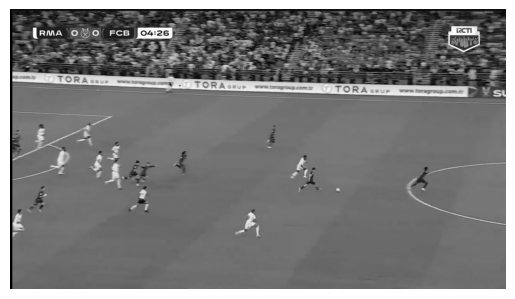

In [15]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Ekstrak bounding box, confidence, dan class
for box in image_result.boxes.data:
    # box adalah tensor [x_min, y_min, x_max, y_max, confidence, class]
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

    # Cetak bounding box
    print(f"Bounding Box: ({x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f})")
    print(f"Confidence: {confidence:.2f}")
    print(f"Class ID: {int(class_id)}")

# Menghitung jumlah bounding box
total_bounding_boxes = len(image_result.boxes.data)
print(f"Total Bounding Boxes: {total_bounding_boxes}")

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

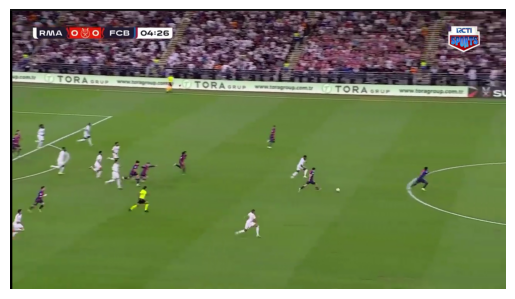

In [16]:
import cv2

# Buka gambar asli
img = cv2.imread("/content/bola.png")

# Loop untuk menggambar bounding box
for box in image_result.boxes.data:
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

    # Gambar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    label = f"Class: {int(class_id)}, Conf: {confidence:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tampilkan gambar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [17]:
!ls runs/detect/predict


bola_gray.jpg  bola.jpg


In [18]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving Screenshot 2025-01-15 222436.png to Screenshot 2025-01-15 222436.png


In [19]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/Screenshot 2025-01-15 222436.png: 192x320 7 players, 53.8ms
Speed: 1.2ms preprocess, 53.8ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 320)


In [20]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [21]:
#lihat hasil sementara
cv2.imwrite("runs/detect/predictions.jpg", annotated_img)


True

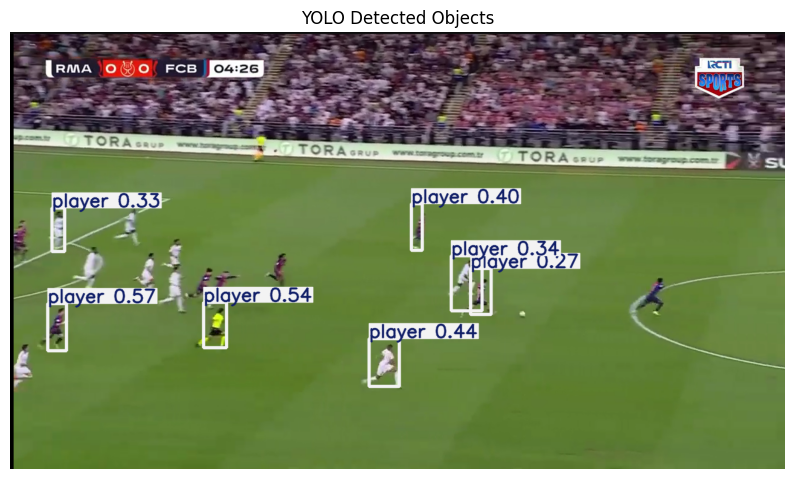

In [22]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()